In [6]:
import pandas as pd
import missingno as msno

df = pd.read_csv("/content/myntra_products_catalog.csv")

In [7]:
df.head()

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White


<Axes: >

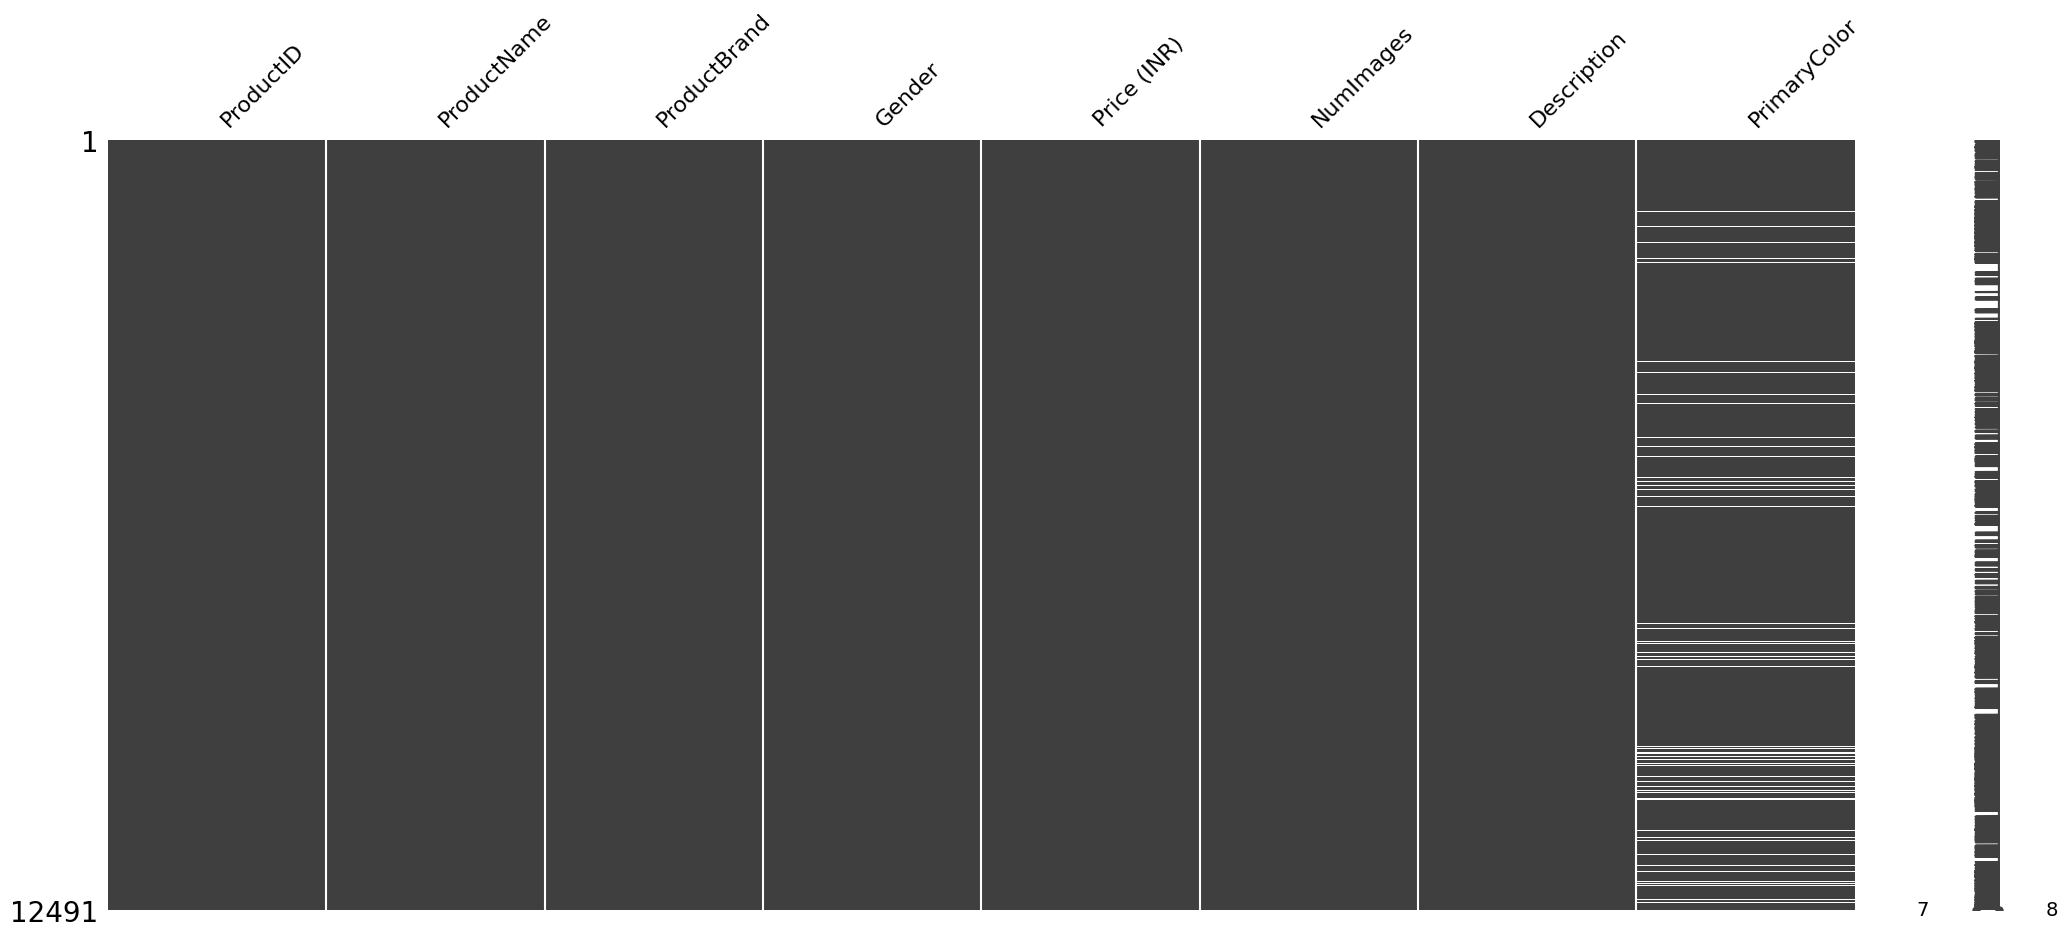

In [5]:
msno.matrix(df)

In [8]:
# Tratamento de valores ausentes
df['PrimaryColor'] = df['PrimaryColor'].fillna("Desconhecido")
df['Description'] = df['Description'].fillna("")
df['ProductName'] = df['ProductName'].fillna("")

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Price_Normalized'] = scaler.fit_transform(df[['Price (INR)']])

In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
encoded_gender = encoder.fit_transform(df[['Gender']])


encoded_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out())


df = pd.concat([df, encoded_df], axis=1)


print(df.head())

   ProductID                                        ProductName ProductBrand  \
0   10017413  DKNY Unisex Black & Grey Printed Medium Trolle...         DKNY   
1   10016283  EthnoVogue Women Beige & Grey Made to Measure ...   EthnoVogue   
2   10009781  SPYKAR Women Pink Alexa Super Skinny Fit High-...       SPYKAR   
3   10015921  Raymond Men Blue Self-Design Single-Breasted B...      Raymond   
4   10017833  Parx Men Brown & Off-White Slim Fit Printed Ca...         Parx   

   Gender  Price (INR)  NumImages  \
0  Unisex        11745          7   
1   Women         5810          7   
2   Women          899          7   
3     Men         5599          5   
4     Men          759          5   

                                         Description PrimaryColor  \
0  Black and grey printed medium trolley bag, sec...        Black   
1  Beige & Grey made to measure kurta with churid...        Beige   
2  Pink coloured wash 5-pocket high-rise cropped ...         Pink   
3  Blue self-design 

#Este notebook realiza o pré-processamento dos dados do dataset, incluindo as seguintes etapas:

#Tratamento de Valores Ausentes:
A coluna PrimaryColor teve valores ausentes preenchidos com "Desconhecido".
As colunas Description e ProductName tiveram valores ausentes preenchidos com strings vazias ("").

#Normalização dos Preços:
A coluna Price (INR) foi normalizada utilizando o método MinMaxScaler, criando uma nova coluna chamada Price_Normalized, com valores escalados entre 0 e 1.

#Codificação de Variáveis Categóricas:
A coluna Gender foi transformada em variáveis dummy utilizando a técnica de One-Hot Encoding com a biblioteca OneHotEncoder.
As variáveis codificadas foram adicionadas ao DataFrame original como novas colunas.